In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import shap

In [4]:
data = pd.read_csv("2509_trainingdata.csv")
data.head()
# print(data.index)

,SBP,DBP,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,114.75,75.00,126.1,506.2,308.5,-8.8,266.8,50.4,72.1,58.2,...,15.8,0.0,0.0,1.7,3.9,0.0,1.1,4.0,4.0,1.0
1,119.67,89.00,316.0,529.0,192.0,15.0,127.0,50.0,21.0,57.0,...,12.7,0.0,0.0,2.7,4.0,0.0,0.1,4.0,4.0,1.2
2,97.00,77.75,337.0,521.0,168.0,5.0,140.0,23.0,16.0,61.0,...,16.7,0.0,0.0,1.9,3.9,0.0,1.2,3.7,3.7,1.1
3,110.67,79.33,337.0,521.0,168.0,5.0,140.0,23.0,16.0,61.0,...,16.7,0.0,0.0,1.9,3.7,0.0,0.8,4.0,4.0,1.2
4,106.00,84.00,318.0,433.0,110.0,-206.4,266.4,50.5,2.0,61.0,...,14.6,0.0,0.0,2.0,3.0,0.0,0.0,4.0,4.0,2.0


In [5]:
# label is SBP
y = data.SBP

# drop SBP/DBP - not features
X = data.drop(columns=["DBP", "SBP"])
X_features = list(X.columns)
print("# features:", len(X_features))

print(X_features)
print(y)


# features: 58
['bedTime_24', 'upTime_24', 'minutesAsleep_24', 'deep_24', 'light_24', 'rem_24', 'wake_24', 'sleepHR_24', 'sleepHRstd_24', 'steps_24', 'speed_24', 'sedentary_24', 'lightly_active_24', 'fairly_active_24', 'very_active_24', 'maxActiveHR_24', 'meanActiveHR_24', 'rhr_24', 'sed_minutes_24', 'fatburn_minutes_24', 'cardio_minutes_24', 'peak_minutes_24', 'stress_24', 'mood_24', 'alcohol_24', 'red_meat_24', 'fruit_24', 'vegetable_24', 'salt_24', 'bedTime_ewma', 'upTime_ewma', 'minutesAsleep_ewma', 'deep_ewma', 'light_ewma', 'rem_ewma', 'wake_ewma', 'sleepHR_ewma', 'sleepHRstd_ewma', 'steps_ewma', 'sedentary_ewma', 'lightly_active_ewma', 'fairly_active_ewma', 'very_active_ewma', 'speed_ewma', 'maxActiveHR_ewma', 'meanActiveHR_ewma', 'rhr_ewma', 'sed_minutes_ewma', 'fatburn_minutes_ewma', 'cardio_minutes_ewma', 'peak_minutes_ewma', 'stress_ewma', 'mood_ewma', 'alcohol_ewma', 'red_meat_ewma', 'fruit_ewma', 'vegetable_ewma', 'salt_ewma']
0      114.75
1      119.67
2       97.00
3   

In [6]:
X

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,126.1,506.2,308.5,-8.8,266.8,50.4,72.1,58.2,4.7,4734.8,...,15.8,0.0,0.0,1.7,3.9,0.0,1.1,4.0,4.0,1.0
1,316.0,529.0,192.0,15.0,127.0,50.0,21.0,57.0,4.5,5681.0,...,12.7,0.0,0.0,2.7,4.0,0.0,0.1,4.0,4.0,1.2
2,337.0,521.0,168.0,5.0,140.0,23.0,16.0,61.0,4.9,5847.0,...,16.7,0.0,0.0,1.9,3.9,0.0,1.2,3.7,3.7,1.1
3,337.0,521.0,168.0,5.0,140.0,23.0,16.0,61.0,4.9,5274.0,...,16.7,0.0,0.0,1.9,3.7,0.0,0.8,4.0,4.0,1.2
4,318.0,433.0,110.0,-206.4,266.4,50.5,2.0,61.0,4.3,4885.0,...,14.6,0.0,0.0,2.0,3.0,0.0,0.0,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,196.0,525.0,210.0,-107.1,266.6,50.4,119.5,54.0,4.7,4374.0,...,25.3,0.4,0.0,2.3,4.0,0.0,0.1,3.2,3.2,1.8
260,128.0,524.0,273.0,7.0,259.0,7.0,122.0,57.0,4.5,4658.0,...,22.6,0.3,0.0,2.3,4.0,0.0,0.1,3.2,3.2,1.9
261,293.0,566.0,247.0,30.0,200.0,17.0,26.0,54.0,4.9,4267.0,...,23.3,0.3,0.0,2.2,4.0,0.0,0.1,3.0,3.0,1.9
262,293.0,566.0,247.0,30.0,200.0,17.0,26.0,54.0,4.9,3884.0,...,23.3,0.3,0.0,2.2,4.0,0.0,0.1,3.0,3.0,1.9


In [7]:
# define model parameters 
max_depth = [int(x) for x in np.linspace(2, 30, 15)]
max_depth.append(None)
param = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
            'max_features': [0.33, 'sqrt', 0.5],
            'max_depth': max_depth,
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]}

model = RandomForestRegressor(n_estimators = 500,  n_jobs = -1)

In [8]:
# hyperparameter tuning
rf_randomCV = RandomizedSearchCV(estimator=model, param_distributions=param, cv=5, verbose=2,
                                   random_state=41, n_jobs=-1, n_iter=50)
rf_randomCV.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=500, n_jobs=-1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28, 30, None],
                                        'max_features': [0.33, 'sqrt', 0.5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=41, verbose=2)

In [9]:
# fit best model
model = rf_randomCV.best_estimator_
model = model.fit(X, y)

y_pred = model.predict(X)
print(model)

RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=1600,
                      n_jobs=-1)


### Shapley Value Analysis

In [10]:
explainer_2 = shap.Explainer(model, X)
shap_values_2 = explainer_2.shap_values(X)

 97%|=================== | 255/264 [00:19<00:00]       

In [11]:
shap_df = pd.DataFrame(np.abs(shap_values_2), index=X.index,columns=X.columns)
shap_df

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,0.012269,0.056257,0.100066,0.067268,0.027236,0.017054,0.033730,0.060360,0.029282,0.041885,...,0.077307,0.032100,0.027624,0.347613,0.239312,0.0,0.178680,0.007835,0.005366,0.194970
1,0.012049,0.074353,0.037675,0.055921,0.074353,0.056189,0.088060,0.038006,0.037403,0.515744,...,0.093319,0.027183,0.024010,0.175278,0.128059,0.0,0.142596,0.004926,0.009654,0.060522
2,0.182927,0.059538,0.036077,0.011762,0.089528,0.167048,0.042472,0.151806,0.051011,0.620955,...,0.067947,0.048902,0.024458,0.585778,0.323439,0.0,0.439887,0.062017,0.065501,0.257825
3,0.130351,0.035612,0.028804,0.032134,0.025648,0.137428,0.053731,0.144335,0.030340,0.473930,...,0.066605,0.038437,0.027830,0.479053,0.319361,0.0,0.255208,0.022232,0.019303,0.092525
4,0.135173,0.124931,0.094789,0.040206,0.076914,0.022565,0.099490,0.142050,0.120526,0.261499,...,0.023088,0.045126,0.028695,0.134129,0.534179,0.0,0.069829,0.002848,0.007146,0.102853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0.059131,0.044331,0.020848,0.134941,0.027457,0.093521,0.031150,0.275755,0.010492,0.133636,...,0.145445,0.144242,0.032849,0.098805,0.107685,0.0,0.107012,0.013803,0.000678,0.133956
260,0.044942,0.032139,0.036033,0.119524,0.018101,0.069253,0.020002,0.042982,0.042078,0.017486,...,0.155294,0.102800,0.029620,0.115130,0.089029,0.0,0.116936,0.019774,0.000500,0.116481
261,0.058946,0.024802,0.049028,0.040397,0.091076,0.146112,0.013230,0.196152,0.025931,0.121164,...,0.131133,0.082366,0.031583,0.081626,0.093624,0.0,0.115830,0.001359,0.012207,0.084856
262,0.086382,0.003787,0.068393,0.035202,0.099988,0.171763,0.026752,0.177058,0.025630,0.067089,...,0.101962,0.066908,0.035443,0.074171,0.091783,0.0,0.103727,0.006367,0.023025,0.080984


In [12]:
shap_df1 = shap_df.mean().to_frame().T
# print(type(shap_new_df))


In [13]:
shap_df1

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,0.062727,0.080234,0.072386,0.080376,0.07736,0.125643,0.083109,0.08182,0.145079,0.370192,...,0.098843,0.035185,0.057341,0.130165,0.174008,0.0,0.126219,0.009863,0.01148,0.136247


In [14]:
shap_df2 = shap_df1.T
# print(type(shap_new_df_r))


shap_df2.head(10)

,0
bedTime_24,0.062727
upTime_24,0.080234
minutesAsleep_24,0.072386
deep_24,0.080376
light_24,0.077360
rem_24,0.125643
wake_24,0.083109
sleepHR_24,0.081820
sleepHRstd_24,0.145079
steps_24,0.370192


In [15]:
shap_df2.rename( columns={0:'SHAP Mean'}, inplace=True )
shap_df2["Rank"] = shap_df2["SHAP Mean"].rank(ascending=False)
shap_df2.head(20)


,SHAP Mean,Rank
bedTime_24,0.062727,35.0
upTime_24,0.080234,29.0
minutesAsleep_24,0.072386,32.0
deep_24,0.080376,28.0
light_24,0.077360,31.0
rem_24,0.125643,15.0
wake_24,0.083109,26.0
sleepHR_24,0.081820,27.0
sleepHRstd_24,0.145079,11.0
steps_24,0.370192,1.0


In [16]:
explainer_1 = shap.Explainer(model, X)
shap_values_1 = explainer_1(X)

 97%|=================== | 257/264 [00:19<00:00]       

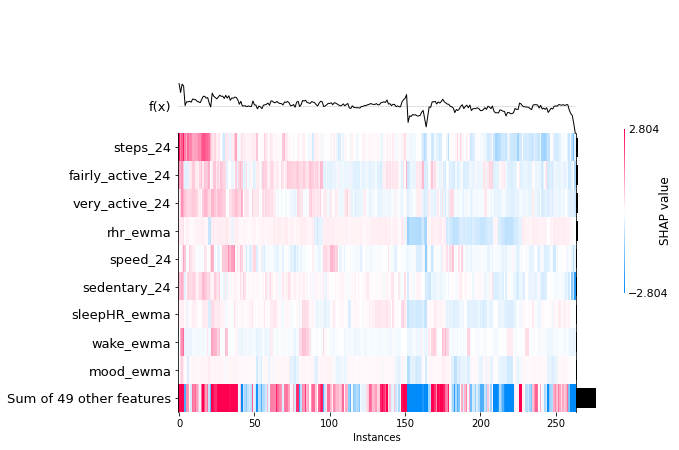

In [17]:
shap.plots.heatmap(shap_values_1)

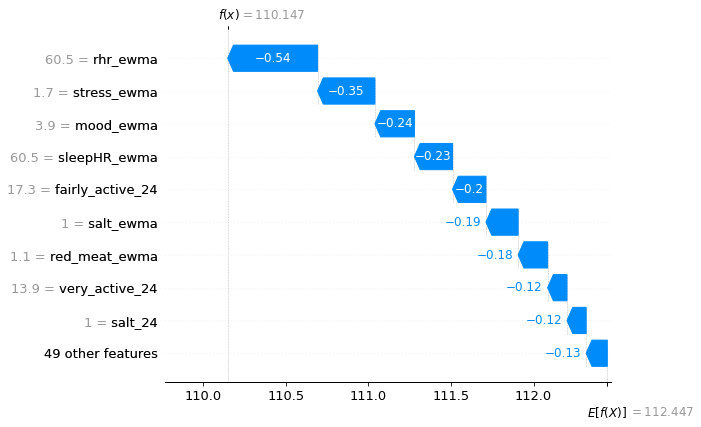

In [18]:
# Individual Data Sample Analysis
n = 0 # data sample number
shap.plots.waterfall(shap_values_1[n])

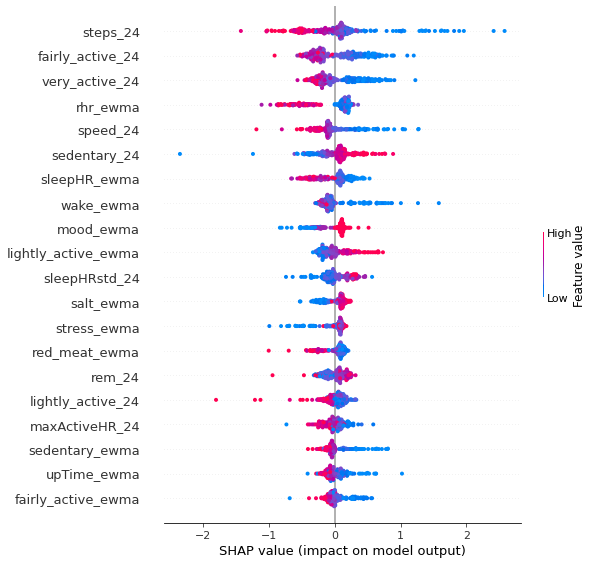

In [19]:
shap.summary_plot(shap_values_1)

### Shapley Interactions

In [20]:
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(X)
print(np.shape(shap_interaction))

(264, 58, 58)


In [21]:
df_si = pd.DataFrame(np.abs(shap_interaction[0]),index=X.columns,columns=X.columns)
df_si

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
bedTime_24,0.018927,0.002544,0.001970,0.001258,0.001199,0.001415,0.001431,4.003447e-04,0.000198,0.001249,...,5.852267e-04,3.578652e-04,1.481357e-04,0.000011,0.003229,0.0,0.003010,2.840010e-04,3.592807e-04,0.003699
upTime_24,0.002544,0.053481,0.000249,0.000224,0.000300,0.000894,0.000515,7.187375e-04,0.000399,0.000694,...,8.052750e-04,7.419806e-04,2.743895e-04,0.000697,0.008277,0.0,0.000943,3.690870e-05,7.986930e-05,0.001633
minutesAsleep_24,0.001970,0.000249,0.089060,0.004116,0.002876,0.001437,0.001362,1.694067e-03,0.002201,0.001272,...,1.536326e-03,7.238142e-05,1.712900e-05,0.000707,0.003330,0.0,0.002205,1.358106e-04,2.365299e-04,0.006629
deep_24,0.001258,0.000224,0.004116,0.034387,0.000117,0.001170,0.000346,1.142558e-03,0.000640,0.003204,...,1.188553e-03,1.274734e-05,2.399474e-04,0.000929,0.002862,0.0,0.001095,9.792354e-05,6.100514e-05,0.001580
light_24,0.001199,0.000300,0.002876,0.000117,0.020057,0.000095,0.000482,8.507328e-04,0.000060,0.001129,...,8.133319e-04,1.293450e-04,3.975635e-05,0.014359,0.003986,0.0,0.016792,4.471977e-04,4.560073e-05,0.002545
rem_24,0.001415,0.000894,0.001437,0.001170,0.000095,0.052996,0.001133,2.546620e-04,0.000478,0.003747,...,2.202868e-04,2.887979e-04,2.853514e-04,0.000911,0.003123,0.0,0.001316,1.394564e-04,2.903094e-05,0.001348
wake_24,0.001431,0.000515,0.001362,0.000346,0.000482,0.001133,0.012260,2.302669e-04,0.001258,0.005571,...,1.327871e-03,1.410370e-04,8.592188e-05,0.014591,0.003485,0.0,0.000029,9.420988e-05,1.926644e-04,0.005066
sleepHR_24,0.000400,0.000719,0.001694,0.001143,0.000851,0.000255,0.000230,8.104915e-02,0.000270,0.004811,...,1.259589e-04,3.498847e-06,1.133543e-04,0.002174,0.002528,0.0,0.001702,4.074573e-04,4.032674e-05,0.000192
sleepHRstd_24,0.000198,0.000399,0.002201,0.000640,0.000060,0.000478,0.001258,2.700627e-04,0.052743,0.000391,...,2.561976e-04,5.356733e-04,4.948199e-05,0.012003,0.000120,0.0,0.001919,7.563233e-04,6.922911e-04,0.001155
steps_24,0.001249,0.000694,0.001272,0.003204,0.001129,0.003747,0.005571,4.810713e-03,0.000391,0.186902,...,1.180160e-03,1.152903e-03,3.252708e-03,0.012051,0.004073,0.0,0.001740,1.568858e-04,2.008490e-04,0.010728


In [22]:
df_si = pd.DataFrame(np.abs(shap_interaction[4]),index=X.columns,columns=X.columns)
df_si

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
bedTime_24,0.119298,0.001962,0.002239,0.002295,0.000437,0.002484,0.005700,0.002786,0.001328,0.002045,...,0.000441,1.840855e-04,3.031151e-04,6.943776e-03,0.003208,0.0,1.934429e-03,1.728205e-05,9.667364e-04,0.002869
upTime_24,0.001962,0.095697,0.003910,0.001536,0.000324,0.002590,0.003747,0.000107,0.003387,0.008947,...,0.002234,1.129206e-03,1.873027e-04,5.168645e-04,0.002345,0.0,1.958040e-03,1.494033e-05,2.039578e-04,0.004544
minutesAsleep_24,0.002239,0.003910,0.061446,0.003509,0.000655,0.000358,0.009763,0.001163,0.000892,0.001156,...,0.000025,5.430602e-04,2.971536e-05,5.612549e-03,0.005281,0.0,1.935829e-03,2.332852e-05,1.595281e-04,0.003970
deep_24,0.002295,0.001536,0.003509,0.039055,0.001328,0.003741,0.002513,0.002983,0.000389,0.000403,...,0.001667,8.064539e-05,2.248599e-04,1.650429e-03,0.003655,0.0,1.652052e-03,3.507193e-04,2.379744e-03,0.003021
light_24,0.000437,0.000324,0.000655,0.001328,0.039274,0.000844,0.001567,0.000770,0.001991,0.002317,...,0.000735,2.352428e-04,9.522460e-05,1.925208e-03,0.002771,0.0,3.187463e-03,6.947345e-04,2.482986e-04,0.000420
rem_24,0.002484,0.002590,0.000358,0.003741,0.000844,0.089393,0.002376,0.000404,0.000878,0.002809,...,0.001289,2.549780e-04,4.071016e-04,8.306296e-04,0.002837,0.0,6.643425e-05,1.379099e-05,2.258727e-05,0.000304
wake_24,0.005700,0.003747,0.009763,0.002513,0.001567,0.002376,0.001439,0.002276,0.001198,0.015399,...,0.001733,7.345079e-04,2.534742e-05,3.688270e-03,0.005795,0.0,2.882635e-04,4.811149e-04,1.000164e-03,0.014807
sleepHR_24,0.002786,0.000107,0.001163,0.002983,0.000770,0.000404,0.002276,0.079349,0.000184,0.005885,...,0.001104,1.461612e-04,1.192808e-04,2.026979e-03,0.001424,0.0,4.577448e-04,3.972028e-04,1.762936e-05,0.000547
sleepHRstd_24,0.001328,0.003387,0.000892,0.000389,0.001991,0.000878,0.001198,0.000184,0.082841,0.000969,...,0.000503,1.767585e-03,2.394187e-04,1.619114e-03,0.000825,0.0,4.002869e-04,2.570734e-04,3.402044e-04,0.000350
steps_24,0.002045,0.008947,0.001156,0.000403,0.002317,0.002809,0.015399,0.005885,0.000969,0.223692,...,0.003024,1.829039e-03,3.449576e-03,2.348806e-03,0.006849,0.0,1.412171e-03,5.436822e-04,3.289044e-04,0.007827


In [23]:
print(np.diag(df_si))

[1.19297646e-01 9.56966513e-02 6.14464340e-02 3.90546637e-02
 3.92744831e-02 8.93933035e-02 1.43924444e-03 7.93493991e-02
 8.28407723e-02 2.23691573e-01 9.76462389e-02 5.75132370e-02
 1.42781738e-01 3.44633381e-01 3.36035996e-01 2.02478345e-01
 6.70869167e-02 6.22038274e-02 3.45620488e-02 6.19697063e-02
 6.14039918e-03 2.43503504e-03 3.00714362e-02 3.09768172e-03
 0.00000000e+00 3.00436646e-03 1.43019944e-03 4.47479510e-04
 1.19841600e-01 2.21021062e-01 1.03597744e-01 3.14181107e-01
 8.57411798e-02 1.11586408e-01 1.02748310e-01 5.97057953e-01
 2.88429414e-01 5.45902651e-03 1.65353954e-02 3.36576137e-02
 2.61215641e-02 7.24713018e-02 1.54753990e-02 2.09689124e-02
 9.94642739e-02 2.01664644e-02 4.70871920e-01 1.00494867e-02
 2.09592075e-02 3.07284592e-02 3.32620369e-02 3.39571884e-02
 5.03624148e-01 0.00000000e+00 8.57896385e-02 3.47984239e-03
 7.24960018e-03 1.57107840e-01]


In [24]:
my_list = []
i = 0
while i<228:
    df_si = pd.DataFrame(np.abs(shap_interaction[i]),index=X.columns,columns=X.columns)
    my_list.append(np.diag(df_si))
    i+=1

In [25]:
my_list

[array([1.89265256e-02, 5.34812939e-02, 8.90604488e-02, 3.43867747e-02,
        2.00574335e-02, 5.29960812e-02, 1.22601871e-02, 8.10491468e-02,
        5.27433652e-02, 1.86901837e-01, 7.61063503e-02, 3.97176316e-02,
        4.00396564e-02, 2.87238543e-01, 2.36682520e-01, 3.31054413e-02,
        2.46376221e-02, 1.11335915e-01, 8.97580487e-03, 8.70094485e-03,
        1.59488939e-03, 2.37055572e-03, 2.78857218e-02, 3.97027474e-03,
        0.00000000e+00, 6.09771129e-04, 9.54372091e-04, 5.79455608e-05,
        1.26431301e-01, 1.53038677e-02, 5.30340517e-02, 2.49640232e-02,
        5.42002071e-02, 8.61882024e-03, 2.57670803e-02, 1.54695068e-01,
        3.26384011e-01, 2.40908576e-02, 1.41926347e-02, 5.15550396e-02,
        1.42903558e-01, 1.26889341e-01, 8.05178380e-03, 5.38100428e-02,
        1.66396101e-01, 5.14037969e-02, 4.95275246e-01, 7.37784411e-03,
        6.86091677e-03, 3.37649446e-02, 3.39603353e-02, 5.09073384e-01,
        2.49680663e-01, 0.00000000e+00, 3.23063520e-01, 7.183484

In [26]:
df = pd.DataFrame (my_list, columns=X.columns)
df

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,0.018927,0.053481,0.089060,0.034387,0.020057,0.052996,0.012260,0.081049,0.052743,0.186902,...,0.006861,0.033765,0.033960,0.509073,0.249681,0.0,0.323064,0.000072,0.006330,0.272495
1,0.109892,0.003171,0.049027,0.019611,0.030070,0.051464,0.073046,0.088662,0.108981,0.581255,...,0.016374,0.036406,0.034051,0.107322,0.119812,0.0,0.083821,0.001774,0.004638,0.142024
2,0.142200,0.017898,0.013946,0.048867,0.063892,0.165527,0.148380,0.080359,0.023486,0.562313,...,0.037965,0.031611,0.032374,0.427547,0.201920,0.0,0.349512,0.010967,0.010682,0.233054
3,0.153587,0.030392,0.019929,0.044779,0.048424,0.183742,0.141890,0.080176,0.038376,0.570122,...,0.031103,0.032544,0.033864,0.464985,0.382599,0.0,0.303262,0.003158,0.001480,0.129321
4,0.119298,0.095697,0.061446,0.039055,0.039274,0.089393,0.001439,0.079349,0.082841,0.223692,...,0.020959,0.030728,0.033262,0.033957,0.503624,0.0,0.085790,0.003480,0.007250,0.157108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.034144,0.033227,0.072604,0.034881,0.093357,0.138774,0.067298,0.085743,0.249084,0.033002,...,0.478941,0.034652,0.036439,0.121270,0.132593,0.0,0.080483,0.000102,0.005270,0.134731
224,0.049957,0.095552,0.105134,0.059958,0.154745,0.060765,0.078902,0.040543,0.194102,0.053146,...,0.439742,0.034027,0.036226,0.118450,0.145981,0.0,0.087994,0.003099,0.005555,0.127786
225,0.040747,0.107349,0.101115,0.068073,0.151599,0.062002,0.071382,0.031946,0.181886,0.047921,...,0.432991,0.032942,0.035411,0.114941,0.140441,0.0,0.085299,0.002655,0.005402,0.121531
226,0.066113,0.037332,0.106367,0.058630,0.154795,0.249455,0.077013,0.078083,0.336527,0.053695,...,0.382950,0.034190,0.035063,0.119733,0.139574,0.0,0.084780,0.003107,0.005258,0.122056


In [27]:
df1 = df.mean().to_frame().T
df1

,bedTime_24,upTime_24,minutesAsleep_24,deep_24,light_24,rem_24,wake_24,sleepHR_24,sleepHRstd_24,steps_24,...,fatburn_minutes_ewma,cardio_minutes_ewma,peak_minutes_ewma,stress_ewma,mood_ewma,alcohol_ewma,red_meat_ewma,fruit_ewma,vegetable_ewma,salt_ewma
0,0.056092,0.066614,0.064077,0.057443,0.066267,0.11621,0.064404,0.080751,0.141028,0.3266,...,0.070013,0.03265,0.061544,0.137863,0.19987,0.0,0.133928,0.00621,0.009825,0.14505


In [28]:
df2 = df1.T
df2.head(10)

,0
bedTime_24,0.056092
upTime_24,0.066614
minutesAsleep_24,0.064077
deep_24,0.057443
light_24,0.066267
rem_24,0.116210
wake_24,0.064404
sleepHR_24,0.080751
sleepHRstd_24,0.141028
steps_24,0.326600


In [29]:
df2.rename( columns={0:'SHAP Mean'}, inplace=True )
df2["Rank"] = df2["SHAP Mean"].rank(ascending=False)
df2.head(20)

,SHAP Mean,Rank
bedTime_24,0.056092,38.0
upTime_24,0.066614,27.0
minutesAsleep_24,0.064077,31.0
deep_24,0.057443,36.0
light_24,0.066267,28.0
rem_24,0.116210,17.0
wake_24,0.064404,30.0
sleepHR_24,0.080751,24.0
sleepHRstd_24,0.141028,12.0
steps_24,0.326600,2.0
